<a href="https://colab.research.google.com/github/Hannahphan13/ISOM835-Transportation-Accident-Prediction/blob/main/01_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = "whitegrid")

In [ ]:
df = pd.read_csv('/content/Transport_Accident.csv')

df.head()

,Record_ID,Timestamp,Latitude,Longitude,Road_ID,Vehicle_Count,Avg_Speed(km/h),Vehicle_Type,Traffic_Density,Weather,Visibility(m),Road_Condition,Accident_Occurred,Accident_Severity,Alert_Generated,temperature,humidity
0,1,03-10-2023 09:50,32.004714,76.971961,RD-285,419,90,Mixed,Medium,Fog,5663,Under Maintenance,Yes,Major,Yes,31.24,61.12
1,2,09-06-2019 08:01,10.632732,77.828652,RD-384,232,104,Mixed,Very High,Rain,896,Wet,No,-,No,48.52,33.07
2,3,08-01-2020 01:38,12.258165,88.810189,RD-282,339,100,Bus,Medium,Storm,9369,Under Maintenance,No,-,No,41.96,43.97
3,4,18-10-2022 05:43,34.289950,95.415253,RD-128,74,63,Car,Low,Clear,2510,Slippery,Yes,Fatal,No,37.96,59.52
4,5,29-06-2023 23:11,31.698993,77.675486,RD-49,187,73,Mixed,Low,Storm,3447,Wet,No,-,No,24.68,48.61


In [ ]:
print("Shape", df.shape)
df.info()

Shape (5500, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Record_ID          5500 non-null   int64  
 1   Timestamp          5500 non-null   object 
 2   Latitude           5500 non-null   float64
 3   Longitude          5500 non-null   float64
 4   Road_ID            5500 non-null   object 
 5   Vehicle_Count      5500 non-null   int64  
 6   Avg_Speed(km/h)    5500 non-null   int64  
 7   Vehicle_Type       5500 non-null   object 
 8   Traffic_Density    5500 non-null   object 
 9   Weather            5500 non-null   object 
 10  Visibility(m)      5500 non-null   int64  
 11  Road_Condition     5500 non-null   object 
 12  Accident_Occurred  5500 non-null   object 
 13  Accident_Severity  5500 non-null   object 
 14  Alert_Generated    5500 non-null   object 
 15  temperature        5500 non-null   float64
 16  humidit

In [ ]:
df['Accident_Severity'].value_counts()

,count
Accident_Severity,
-,5056
Minor,156
Fatal,147
Major,141


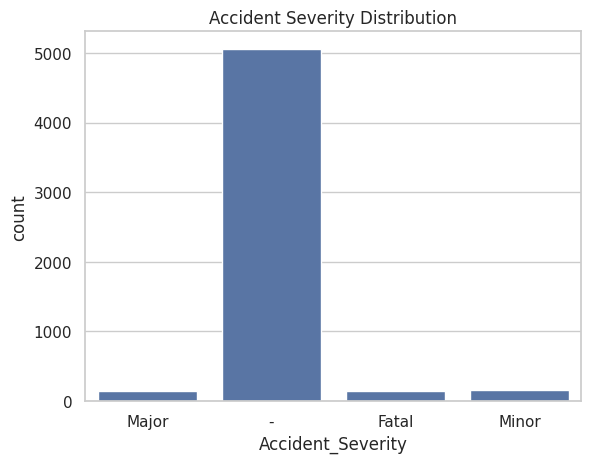

In [ ]:
sns.countplot(x='Accident_Severity', data=df)
plt.title('Accident Severity Distribution')
plt.show()

In [ ]:
df_clean=df[df['Accident_Severity'] !='-']
df_clean.shape
df_clean['Accident_Severity'].value_counts()

,count
Accident_Severity,
Minor,156
Fatal,147
Major,141


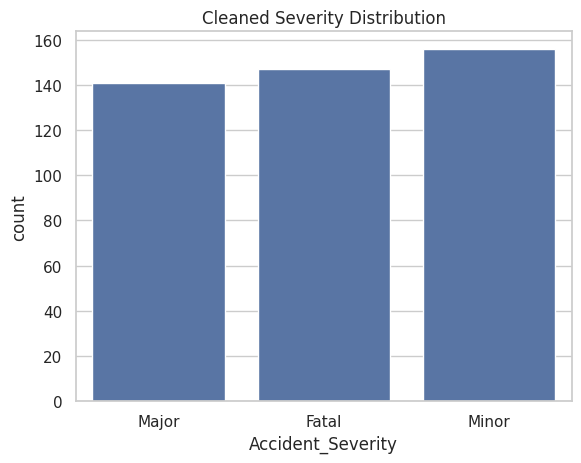

In [ ]:
sns.countplot(x='Accident_Severity', data=df_clean)
plt.title('Cleaned Severity Distribution')
plt.show()

In [ ]:
severity_map={
    'Minor':0,
    'Major':1,
    'Fatal':2
}

df_clean['Severity_Label']=df_clean['Accident_Severity'].map(severity_map)
df_clean[['Accident_Severity', 'Severity_Label']].head()

/tmp/ipython-input-3418634780.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Severity_Label']=df_clean['Accident_Severity'].map(severity_map)


,Accident_Severity,Severity_Label
0,Major,1
3,Fatal,2
51,Fatal,2
55,Minor,0
72,Fatal,2


In [ ]:
df_model=pd.get_dummies(df_clean, drop_first = True)
df_model.head()

,Record_ID,Latitude,Longitude,Vehicle_Count,Avg_Speed(km/h),Visibility(m),temperature,humidity,Severity_Label,Timestamp_01-02-2019 22:30,...,Weather_Fog,Weather_Rain,Weather_Snow,Weather_Storm,Road_Condition_Slippery,Road_Condition_Under Maintenance,Road_Condition_Wet,Accident_Severity_Major,Accident_Severity_Minor,Alert_Generated_Yes
0,1,32.004714,76.971961,419,90,5663,31.24,61.12,1,False,...,True,False,False,False,False,True,False,True,False,True
3,4,34.289950,95.415253,74,63,2510,37.96,59.52,2,False,...,False,False,False,False,True,False,False,False,False,False
51,52,31.941214,72.961907,211,107,8017,43.25,53.10,2,False,...,False,False,True,False,True,False,False,False,False,False
55,56,8.449869,74.889258,155,61,8290,47.66,72.62,0,False,...,False,False,False,True,True,False,False,False,True,False
72,73,32.313302,93.976403,21,54,5741,20.17,79.31,2,False,...,False,False,False,True,False,True,False,False,False,True


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Define target column
target_col = 'Severity_Label'
# X =all features except the target (and text severity if present)

X= df_model.drop(['Accident_Severity', target_col], errors='ignore')
y= df_model[target_col]

X_train, X_test, y_train, y_test =train_test_split (
    X,y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape, y_train.value_counts(), y_test.value_counts()

((333, 753),
 (111, 753),
 Severity_Label
 0    117
 2    110
 1    106
 Name: count, dtype: int64,
 Severity_Label
 0    39
 2    37
 1    35
 Name: count, dtype: int64)

Random Forest Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        37

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg       1.00      1.00      1.00       111



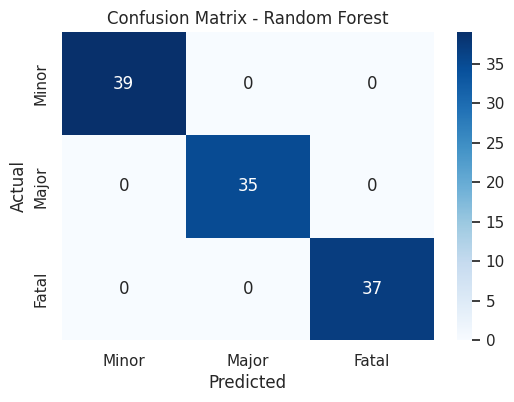

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create and train the model
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'   # handles slight imbalance just in case
)

rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Minor','Major','Fatal'],
            yticklabels=['Minor','Major','Fatal'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Extract feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Show top 15
feat_imp.head(15)


,Feature,Importance
8,Severity_Label,0.241126
750,Accident_Severity_Major,0.180785
751,Accident_Severity_Minor,0.160178
1,Latitude,0.026362
5,Visibility(m),0.026256
2,Longitude,0.024003
3,Vehicle_Count,0.023720
6,temperature,0.023529
0,Record_ID,0.023121
7,humidity,0.022480


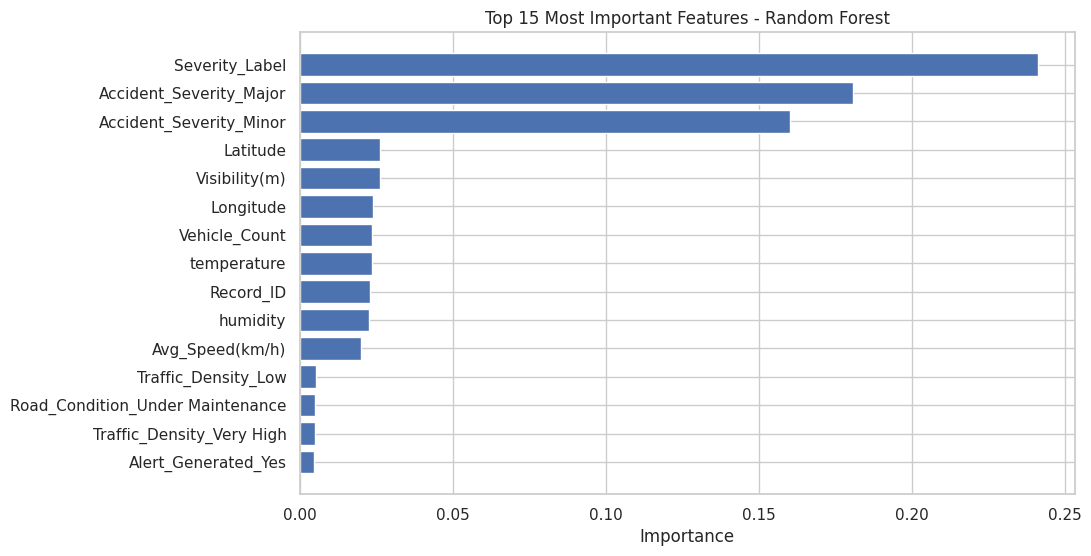

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(feat_imp['Feature'].head(15), feat_imp['Importance'].head(15))
plt.gca().invert_yaxis()
plt.title("Top 15 Most Important Features - Random Forest")
plt.xlabel("Importance")
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        37

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg       1.00      1.00      1.00       111



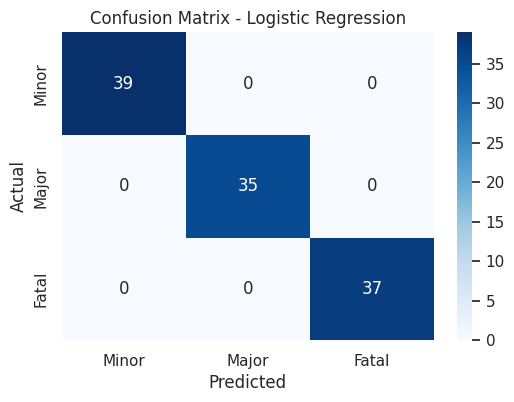

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

cm_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(6,4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Minor','Major','Fatal'],
            yticklabels=['Minor','Major','Fatal'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Decision Tree Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        37

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg       1.00      1.00      1.00       111



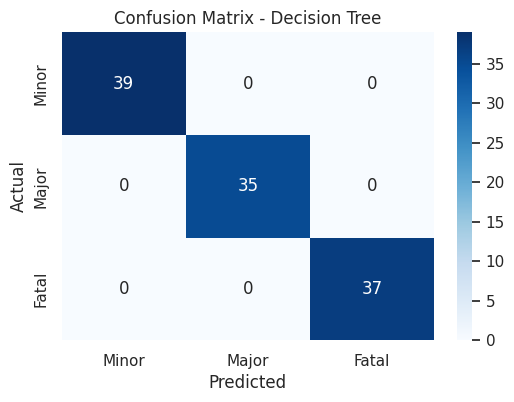

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Minor','Major','Fatal'],
            yticklabels=['Minor','Major','Fatal'])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Score: 1.0

Accuracy on Test Set: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        37

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg       1.00      1.00      1.00       111



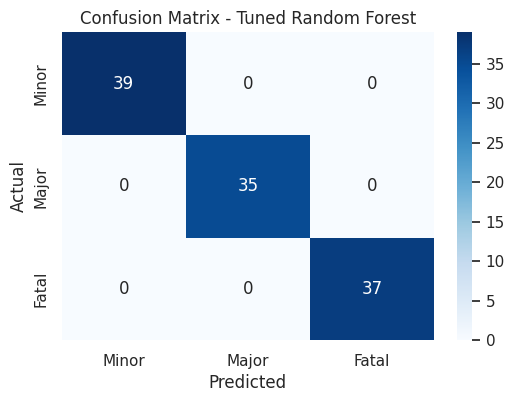

In [ ]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_tuned = RandomForestClassifier(random_state=42, class_weight='balanced')

grid_search = GridSearchCV(
    estimator=rf_tuned,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

# Evaluate tuned model on test set
best_rf = grid_search.best_estimator_
y_pred_tuned = best_rf.predict(X_test)

print("\nAccuracy on Test Set:", accuracy_score(y_test, y_pred_tuned))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned))

cm_tuned = confusion_matrix(y_test, y_pred_tuned)

plt.figure(figsize=(6,4))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Minor','Major','Fatal'],
            yticklabels=['Minor','Major','Fatal'])
plt.title("Confusion Matrix - Tuned Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()